In [33]:
!pip3 install pandas numpy plotly.express matplotlib seaborn plotly plotly


Defaulting to user installation because normal site-packages is not writeable


In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [57]:
def load_dataset():
    df = pd.read_csv("googleplaystore.csv")
    return df

In [58]:
apps = load_dataset()
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:

def print_summarize_dataset(dataset):
    print("This is information about dataset")
    print(dataset.info())
    print("This is statistic information about dataset")
    print(dataset.describe())
    print("This is shape of dataset")
    print(dataset.shape)

In [60]:
ll=  print_summarize_dataset(apps)

This is information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
This is statistic information about dataset
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min 

In [61]:
def clean_dataset(dataset):
    filter = {'"': '', ',': '', ';': ' ', 'Everyone 10+': 'Everyone', 'Adults only 18+': 'Adults only', 'Mature 17+': 'Mature', 'Varies with device': 'NaN', 'Unrated': 'NaN', 'and up': ''}
    dataset.dropna(inplace=True)
    try:
        dataset.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)
    except:
        pass
    dataset.replace(filter, inplace=True, regex=True)
    dataset["App"] = dataset["App"].apply(lambda x: x.replace("&", "-")).str.title()
    dataset['Installs'] = dataset['Installs'].apply(lambda x: str(x).replace(",", "").replace("+", "").replace("Free", "0")).astype(int)
    dataset['Genres'] = dataset['Genres'].apply(lambda x: x.replace("&", "and").replace(";", ""))
    dataset['Price'] = dataset['Price'].apply(lambda x: str(x).replace("$", "").replace('Everyone', '0')).astype(float)
    dataset['Content Rating'] = dataset['Content Rating'].str.replace('+', '')
    dataset['Size'] = dataset['Size'].apply(lambda x: float(x[:-1]) * 1 if x[-1] == 'M' else (float(x[:-1]) / 1000 if x[-1] == 'k' else float(x)))

    #dataset['Size'] = dataset['Size'].apply(lambda x: (float(x.replace("Varies with device", '0').replace("'", '').replace('M', '').replace('k', ""))/1024 if str(x)[-1] == 'k' else float(x)))
    dataset['Size'].replace('Varies with device', np.nan, inplace=True)
    dataset['Size'] = pd.to_numeric(dataset['Size'], errors='coerce')
    dataset.drop_duplicates(inplace=True)
    dataset['Price']= dataset['Price'].astype(float)
    dataset['Rating'] = dataset['Rating'].astype(float)
    dataset['Content Rating'] = dataset['Content Rating'].replace('NaN', 'Unrated')
    dataset['Rating'] = dataset['Rating'].astype(float)
    dataset['Reviews'] = dataset['Reviews'].astype(float) 
    dataset['Installs'] = dataset['Installs'].astype(float)
    dataset['Popularity'] = dataset.Rating *10**7  * dataset.Reviews *10**2 * dataset.Installs
    
    return dataset

cleaned_apps = clean_dataset(apps)
cleaned_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Photo Editor - Candy Camera - Grid - Scrapbook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art and Design,January 7 2018,6.519000e+15
1,Coloring Book Moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art and Design Pretend Play,January 15 2018,1.885650e+18
2,U Launcher Lite – Free Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art and Design,August 1 2018,2.056485e+21
3,Sketch - Draw - Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art and Design,June 8 2018,4.851990e+22
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art and Design Creativity,June 20 2018,4.158100e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Fr Calculator,FAMILY,4.0,7.0,2.6,500.0,Free,0.0,Everyone,Education,June 18 2017,1.400000e+13
10836,Sya9A Maroc - Fr,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,July 25 2017,8.550000e+14
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,July 6 2018,2.000000e+12
10839,The Scp Foundation Db Fr Nn5N,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature,Books and Reference,January 19 2015,5.130000e+14


In [62]:
def print_histograms(dataset):
    fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Installs of Category', "Rating of Category","Reviews of Category", "Size of Category"], column_widths=[0.5, 0.5],row_heights=[0.5, 0.5])
    fig.add_trace(go.Histogram(x=dataset['Category'], y=dataset['Installs']), col=1, row=1)
    fig.add_trace(go.Histogram(x=dataset['Category'], y=dataset['Rating']), col=2, row=1)
    fig.add_trace(go.Histogram(x=dataset['Category'], y=dataset['Reviews']), col=1, row=2)
    fig.add_trace(go.Histogram(x=dataset['Category'], y=dataset['Size']), col=2, row=2)
    fig.update_layout(width=1400, height=1000)
    fig.show()

In [63]:
print_histograms(cleaned_apps)

In [64]:
def compute_correlations_matrix(dataset):
   
    fig = px.imshow(dataset.select_dtypes(np.number).corr(), text_auto=True)
    fig.show()

In [65]:
print(compute_correlations_matrix(cleaned_apps))

None


In [66]:
cleaned_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Photo Editor - Candy Camera - Grid - Scrapbook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art and Design,January 7 2018,6.519000e+15
1,Coloring Book Moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art and Design Pretend Play,January 15 2018,1.885650e+18
2,U Launcher Lite – Free Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art and Design,August 1 2018,2.056485e+21
3,Sketch - Draw - Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art and Design,June 8 2018,4.851990e+22
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art and Design Creativity,June 20 2018,4.158100e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Fr Calculator,FAMILY,4.0,7.0,2.6,500.0,Free,0.0,Everyone,Education,June 18 2017,1.400000e+13
10836,Sya9A Maroc - Fr,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,July 25 2017,8.550000e+14
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,July 6 2018,2.000000e+12
10839,The Scp Foundation Db Fr Nn5N,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature,Books and Reference,January 19 2015,5.130000e+14


In [67]:
def print_scatter_matrix(criteria,data,color):
     
      fig = px.scatter_matrix(data_frame=data, dimensions=criteria, color=color)
      fig.update_layout(width=1300, height=600)
      fig.show()

In [68]:
print_scatter_matrix(criteria=['Rating', 'Reviews', 'Installs'], color='Type',data=cleaned_apps)

In [69]:
family_paid = cleaned_apps[(cleaned_apps['Category'] == "FAMILY") & (cleaned_apps['Type'] == "Paid")]
family_paid.sort_values(by="Installs", inplace=True, ascending=False)
family_paid.reset_index(inplace=True)
family_paid.drop("index", axis=1, inplace=True)

/var/folders/pk/1kl236_n5wv0264hx5pndd3r0000gn/T/ipykernel_40453/482037436.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/1kl236_n5wv0264hx5pndd3r0000gn/T/ipykernel_40453/482037436.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
top_10 = family_paid.sort_values(by='Installs', ascending=False).head(10)

In [71]:
top_10

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Minecraft,FAMILY,4.5,2375336.0,NaN,10000000.0,Paid,6.99,Everyone,Arcade Action and Adventure,July 24 2018,1.068901e+23
1,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000.0,Paid,6.99,Everyone,Arcade Action and Adventure,July 24 2018,1.069454e+23
2,Cut The Rope Gold,FAMILY,4.6,61264.0,43.0,1000000.0,Paid,0.99,Everyone,Puzzle,June 19 2018,2.818144e+20
4,Card Wars - Adventure Time,FAMILY,4.3,129603.0,23.0,1000000.0,Paid,2.99,Everyone,Card Action and Adventure,February 11 2016,5.572929e+20
5,Infinity Dungeon Vip,FAMILY,4.3,21804.0,44.0,1000000.0,Paid,0.99,Everyone,Role Playing,July 3 2018,9.375720e+19
6,Bloons Td 5,FAMILY,4.6,190086.0,94.0,1000000.0,Paid,2.99,Everyone,Strategy,July 13 2018,8.743956e+20
3,Where'S My Water?,FAMILY,4.7,188740.0,69.0,1000000.0,Paid,1.99,Everyone,Puzzle Brain Games,July 5 2018,8.870780e+20
7,Nba Jam By Ea Sports™,FAMILY,4.3,56444.0,43.0,500000.0,Paid,4.99,Everyone,Sports Action and Adventure,February 8 2017,1.213546e+20
8,Farming Simulator 16,FAMILY,4.2,32812.0,14.0,500000.0,Paid,2.99,Everyone,Simulation Education,April 10 2018,6.890520e+19
9,Five Nights At Freddy'S 2,FAMILY,4.6,73919.0,40.0,500000.0,Paid,2.99,Teen,Strategy,November 15 2014,1.700137e+20


In [72]:
fig = px.bar(top_10, x='App', y='Installs', color='App', title='The most populars paid apps of Family category')
fig.show()

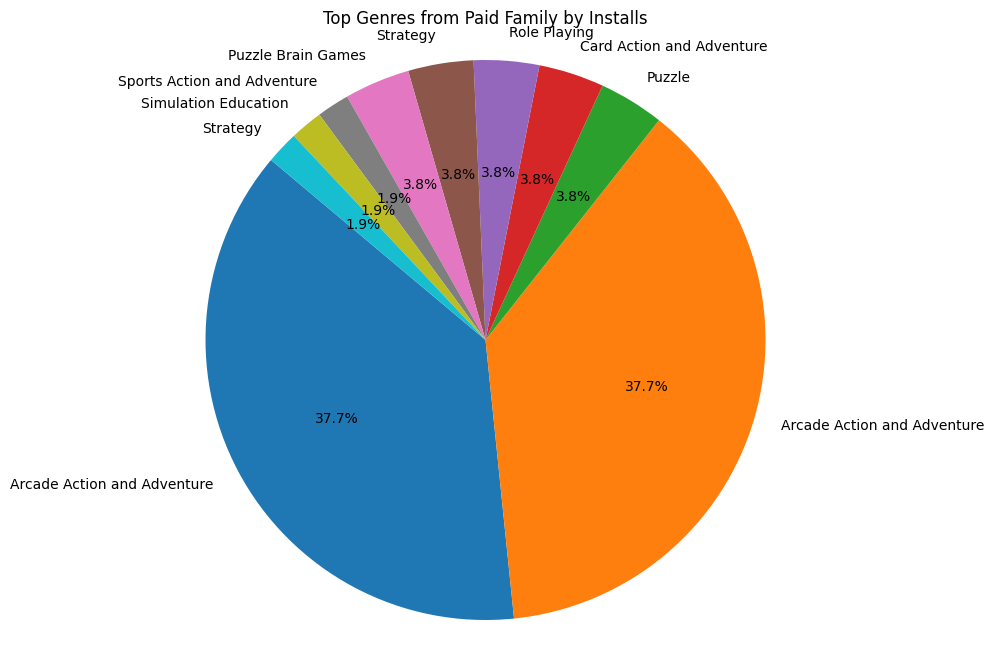

In [73]:
plt.figure(figsize=(10, 8))
plt.pie(top_10['Installs'], labels=top_10['Genres'], colors=plt.cm.tab10.colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Genres from Paid Family by Installs')
plt.axis('equal') 
plt.show()

In [74]:
nbr_installation_per_category = cleaned_apps.groupby(by="Category").sum()
nbr_installation_per_category_top_10 = nbr_installation_per_category.sort_values(by="Installs", ascending=False).head(10)

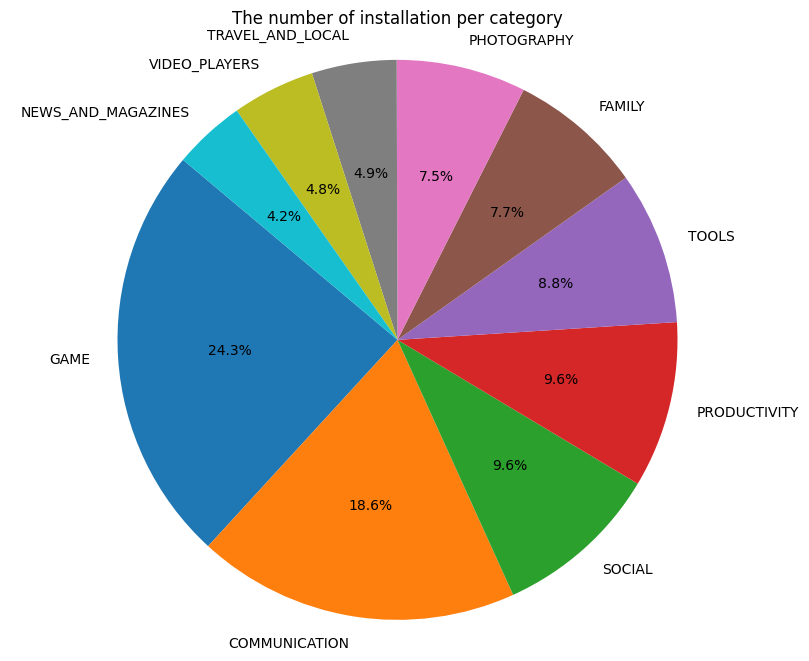

In [75]:
plt.figure(figsize=(10, 8))
plt.pie(nbr_installation_per_category_top_10['Installs'], labels=nbr_installation_per_category_top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('The number of installation per category')
plt.axis('equal')  
plt.show()

In [86]:
hello = cleaned_apps.groupby(by="Category")['Price'].mean().reset_index()
hello.sort_values('Price', ascending=False)

,Category,Price
12,FINANCE,7.696751
18,LIFESTYLE,6.429115
20,MEDICAL,2.148543
11,FAMILY,1.328940
23,PERSONALIZATION,0.401883
32,WEATHER,0.392400
28,SPORTS,0.325909
29,TOOLS,0.283629
14,GAME,0.261043
24,PHOTOGRAPHY,0.250855


/var/folders/pk/1kl236_n5wv0264hx5pndd3r0000gn/T/ipykernel_40453/3502801868.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




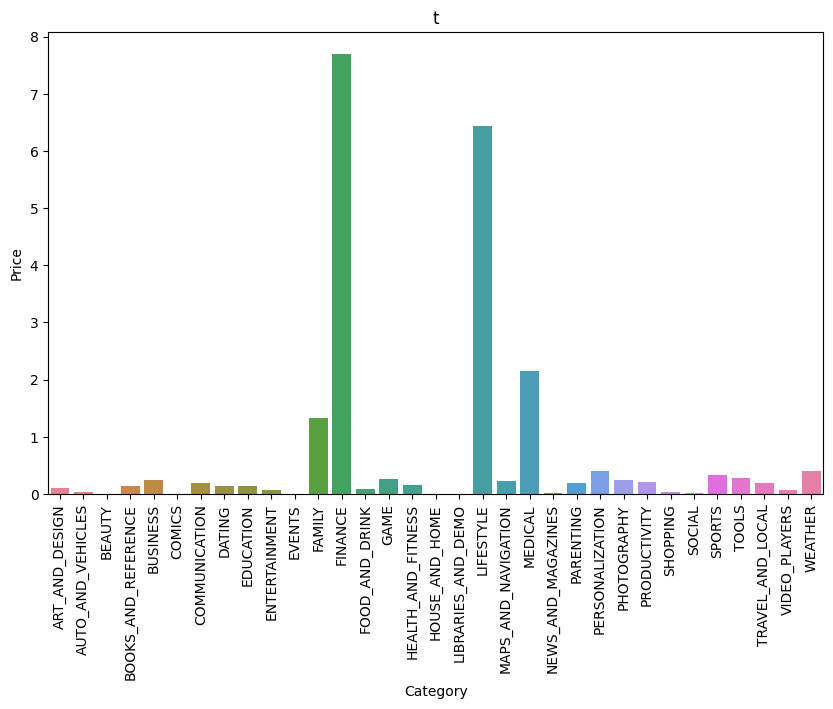

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hello, x=hello.Category, y='Price', palette='husl')
plt.title('t')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [1]:
cleaned_apps_filtered = cleaned_apps.sort_values(by='Price', ascending=False).head(30)
fig = px.sunburst(cleaned_apps_filtered.sort_values(by='Price', ascending=False), path=['Category', 'App'], values='Price',hover_data=['Price'])
fig.update_layout(title="Most expensive apps per category",)
fig.show()

NameError: name 'cleaned_apps' is not defined